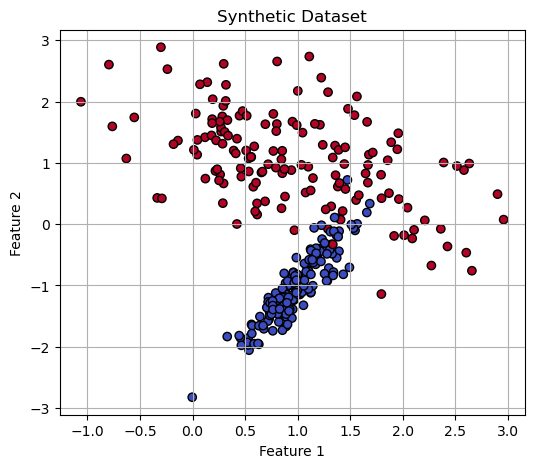

Accuracy without scaling: 0.9555555555555556
Accuracy with scaling: 0.9555555555555556


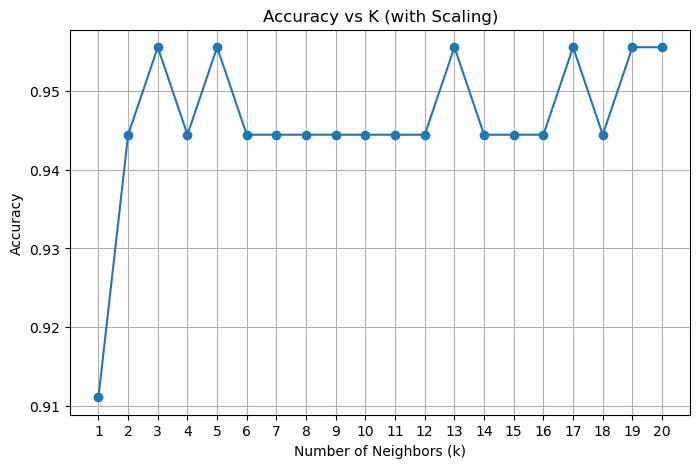

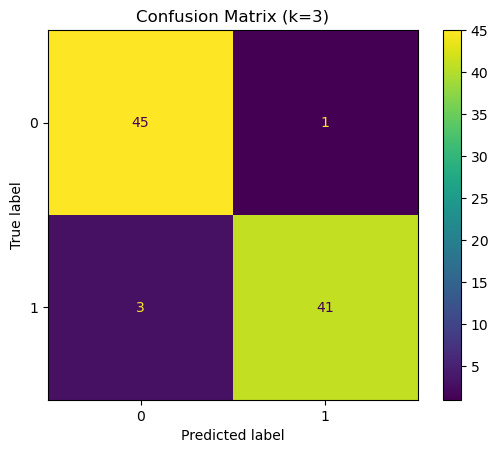

In [2]:
# K-Nearest Neighbours Tutorial: Distance Metrics and Feature Scaling

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- Step 1: Generate a synthetic dataset ---
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Plot raw data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# --- Step 2: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Step 3: Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: KNN without scaling (for comparison) ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)

print("Accuracy without scaling:", accuracy_score(y_test, y_pred_raw))

# --- Step 5: KNN with scaling ---
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

# --- Step 6: Compare performance for different k values ---
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K (with Scaling)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# --- Step 7: Visualise confusion matrix for best k ---
best_k = k_values[np.argmax(accuracies)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_best = best_knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_best)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()
